Importing all libraries

In [389]:
# Installing Altair as a visual dependancy
!pip install altair

#Importing mathematical dependacies and data processing libraries
import numpy as np 
import pandas as pd 
#Importing processing dependancies for the diabetic data
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from itertools import cycle
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
#Importing more dependancies fromsklearn for processing of the dataset acquired
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Uploading and Reading the diabetic dataset

In [390]:
#Using panda library to read the uploaded csv. file
data = pd.read_csv("../content/diabetic_dataset.csv")

print("The rows and columns of the diabetic_dataset are:", data.shape, "respectively.")

The rows and columns of the diabetic_dataset are: (768, 9) respectively.


Reading the data information available in the dataset

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Description of dataset

In [392]:
# Describing the dataset with value count, mean and other columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood_Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [393]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_Pedigree_Function  Age  Outcome  
0        

Cleaning the data described data

In [394]:
#Formatting the dataset to have clean data

for col in data.columns:
    print("{} min_value is {}".format(col, data[col].min()))
    print("{} max_value is {}".format(col, data[col].max()))
    print("{} mean_value is {}".format(col, data[col].mean()))
    print(" ")

Pregnancies min_value is 0
Pregnancies max_value is 17
Pregnancies mean_value is 3.8450520833333335
 
Glucose min_value is 0
Glucose max_value is 199
Glucose mean_value is 120.89453125
 
Blood_Pressure min_value is 0
Blood_Pressure max_value is 122
Blood_Pressure mean_value is 69.10546875
 
Skin_Thickness min_value is 0
Skin_Thickness max_value is 99
Skin_Thickness mean_value is 20.536458333333332
 
Insulin min_value is 0
Insulin max_value is 846
Insulin mean_value is 79.79947916666667
 
BMI min_value is 0.0
BMI max_value is 67.1
BMI mean_value is 31.992578124999998
 
Diabetes_Pedigree_Function min_value is 0.078
Diabetes_Pedigree_Function max_value is 2.42
Diabetes_Pedigree_Function mean_value is 0.47187630208333325
 
Age min_value is 21
Age max_value is 81
Age mean_value is 33.240885416666664
 
Outcome min_value is 0
Outcome max_value is 1
Outcome mean_value is 0.3489583333333333
 


Replacing 0 values 

In [395]:
'''Since there are NIL (0) values in our implementation above and
   attributes like Glucose, Blood_Pressure, Skin_thickness and Insulin should not have NIL values in it.
   We will be rectifying the values from NIL to mean and median format '''

for col in data.columns[0:8]:
    print("The missing percentage of {} is {} ".format(col, data[data[col] == 0][col].count() /data[col].count()* 100))

The missing percentage of Pregnancies is 14.453125 
The missing percentage of Glucose is 0.6510416666666667 
The missing percentage of Blood_Pressure is 4.557291666666666 
The missing percentage of Skin_Thickness is 29.557291666666668 
The missing percentage of Insulin is 48.69791666666667 
The missing percentage of BMI is 1.4322916666666665 
The missing percentage of Diabetes_Pedigree_Function is 0.0 
The missing percentage of Age is 0.0 


In [396]:
# Replace 0 value with null data

data[["Glucose","Blood_Pressure", "Skin_Thickness", "Insulin", "BMI", "Diabetes_Pedigree_Function"]] = data[["Glucose","Blood_Pressure", "Skin_Thickness", "Insulin", "BMI", "Diabetes_Pedigree_Function"]].replace(0, np.nan)
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Plotting all the NIL value percentage on a bar chart

Insulin                       48.697917
Skin_Thickness                29.557292
Blood_Pressure                 4.557292
BMI                            1.432292
Glucose                        0.651042
Pregnancies                    0.000000
Diabetes_Pedigree_Function     0.000000
Age                            0.000000
Outcome                        0.000000
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

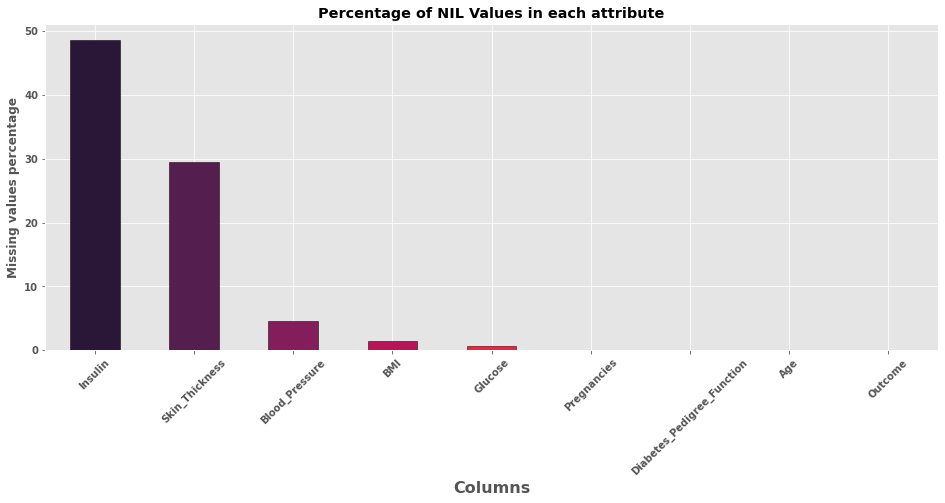

In [397]:
#Plotting the NIL values with a bar graph
plt.figure(figsize = (16, 6))
percentage = (data.isnull().mean()) * 100
percentage.sort_values(ascending = False).plot.bar(color = sns.color_palette("rocket", 8), edgecolor= "black")
print(percentage.sort_values(ascending=False))
plt.xticks(rotation=45, weight = "bold")
plt.title("Percentage of NIL Values in each attribute", weight= "bold")
plt.xlabel('Columns', size=16, weight="bold")
plt.ylabel('Missing values percentage', weight = "bold")
plt.yticks(weight ="bold")
plt.show

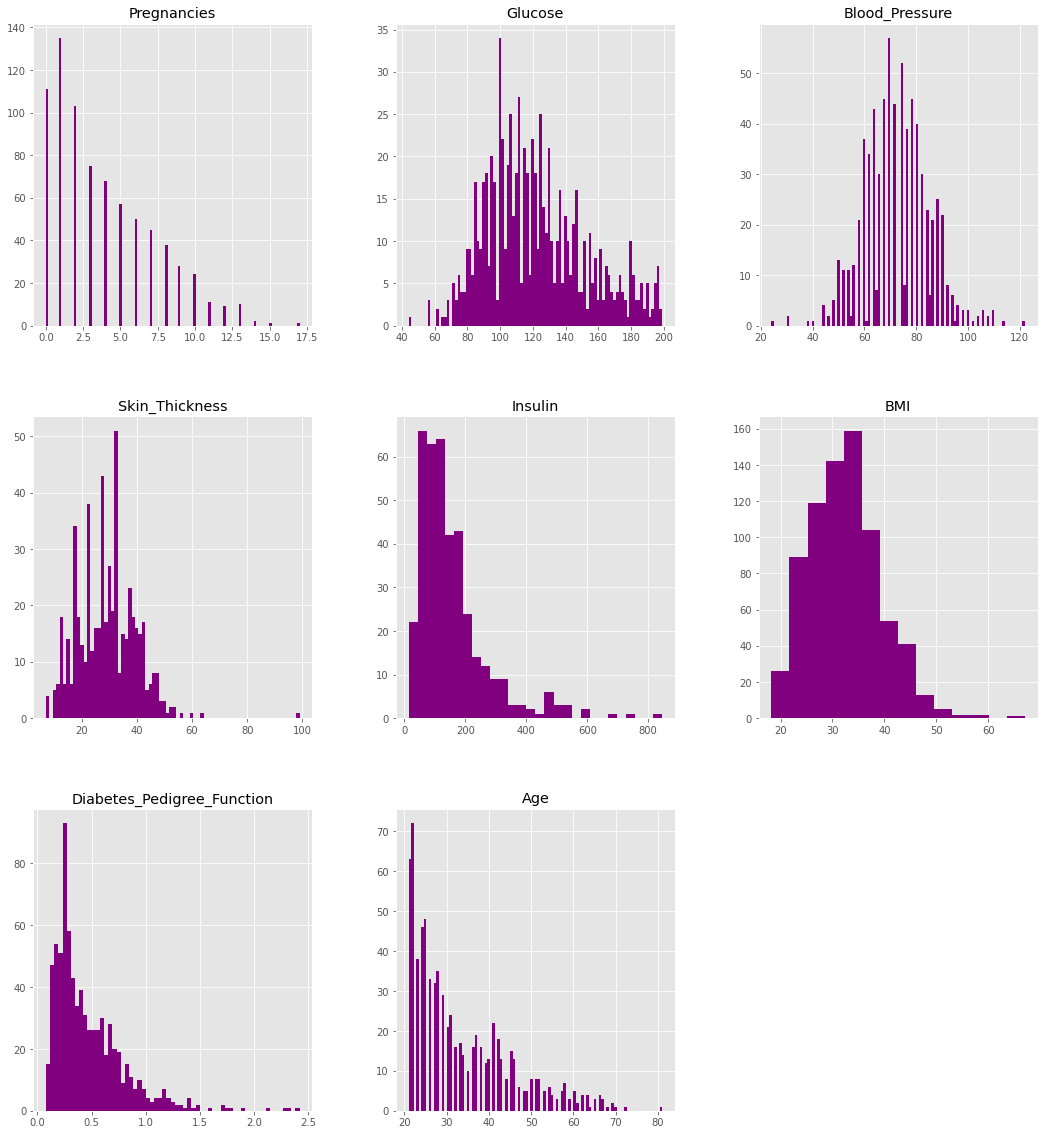

In [398]:
# Distribution_curve of all the attributes


columns = data.drop('Outcome', axis = 1).columns
data[columns].hist(figsize= (18, 20), bins = "stone", color= 'purple')

plt.show()


Verification of the distribution curve for better technical understanding

In [399]:
# Cross verifying the relevance of the above curve

from scipy.stats import skew
columns = data.drop("Outcome", axis = 1).columns
for col in columns:
    print(" Relevance of the {} attribute is {}".format(col, data[col].skew()))

 Relevance of the Pregnancies attribute is 0.9016739791518588
 Relevance of the Glucose attribute is 0.5309885349396285
 Relevance of the Blood_Pressure attribute is 0.13415273171959252
 Relevance of the Skin_Thickness attribute is 0.690619013984192
 Relevance of the Insulin attribute is 2.166463843812443
 Relevance of the BMI attribute is 0.5939697505712673
 Relevance of the Diabetes_Pedigree_Function attribute is 1.919911066307204
 Relevance of the Age attribute is 1.1295967011444805


In [400]:
#Rectifying 0 values of Glucose, Blood_Pressure, Skin_Thinkness and BMI columns with mean values

col=['Glucose' ,'Blood_Pressure' ,'Skin_Thickness' ,'BMI']
for i in col:
    data[i].replace(np.nan,data[i].mean(),inplace=True)

# Replacing 0 values of Insulin with Median due to its high skewness

data["Insulin"].replace(np.nan,data["Insulin"].median(),inplace=True)


print(data.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


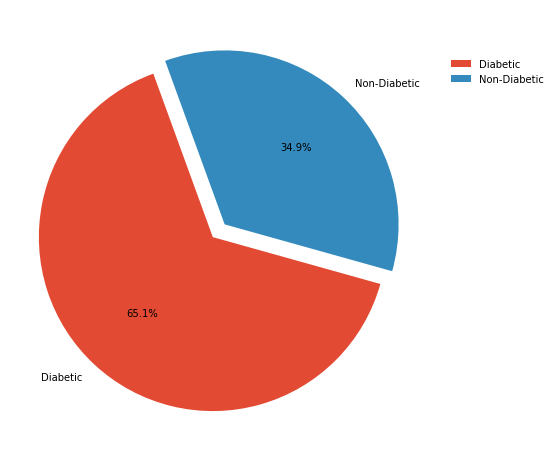

In [401]:
#Visual demonstration of diabetic and non_diabetic population

outcome_val = data["Outcome"].value_counts()
total = data["Outcome"].value_counts().sum()

fig, ax = plt.subplots(figsize=(12,8),)
label = ['Diabetic',
        'Non-Diabetic']
percentages = [outcome_val[0]/total, outcome_val[1]/total]
explode = (0.1, 0)
ax.pie(outcome_val, autopct="%.1f%%", labels = label, explode = explode, startangle=110)
ax.legend(frameon=False, bbox_to_anchor=(1,0.9))
plt.show()

Outcome                              0           1
Diabetes_Pedigree_Function    0.429734    0.550500
Pregnancies                   3.298000    4.865672
Skin_Thickness               27.768651   31.736944
BMI                          30.888434   35.384757
Age                          31.190000   37.067164
Blood_Pressure               70.935397   75.147324
Glucose                     110.710121  142.165573
Insulin                     127.792000  164.701493


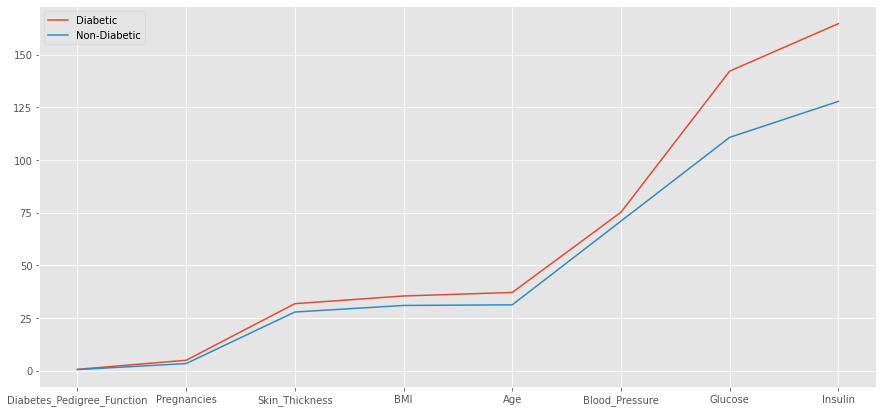

In [402]:
#Mean values determined on a line graph

avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)
print(avg_data_according_to_disease)

label = ['Non-Diabetic','Diabetic']

plt.figure(figsize = (15,7))
sns.lineplot(x = avg_data_according_to_disease[1].index, y = avg_data_according_to_disease[1].values, label = label[1])
sns.lineplot(x = avg_data_according_to_disease[0].index, y = avg_data_according_to_disease[0].values, label = label[0])

Interdependancy of outcome and percentage difference determined on a bar chart 

                     Column_1   Column_2
5              Blood_Pressure   5.937695
2              Skin_Thickness  14.290551
3                         BMI  14.556655
4                         Age  18.843104
0  Diabetes_Pedigree-Function  28.102501
6                     Glucose  28.412445
7                     Insulin  28.882475
1                 Pregnancies  47.534010


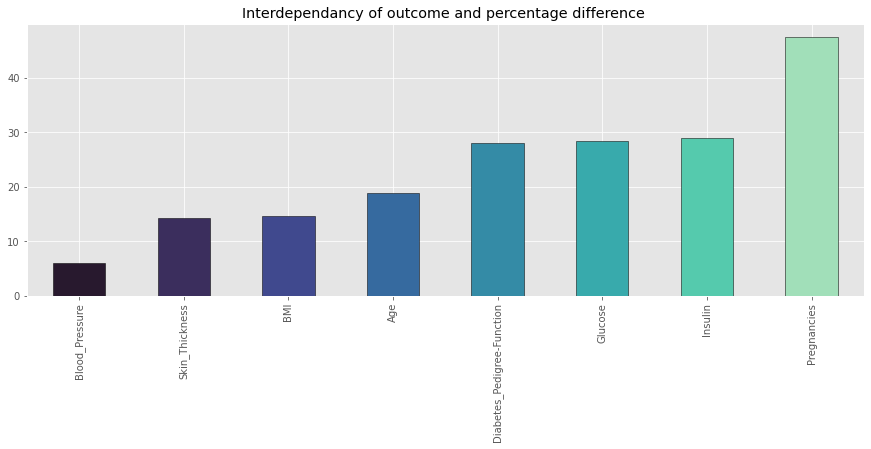

In [403]:
avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)

non_diab = avg_data_according_to_disease[0]
diab =  avg_data_according_to_disease[1]
perc = []

for item in range(0,8):
    percentage_change = ((diab[item] - non_diab[item])/non_diab[item] * 100)
    perc.append(percentage_change)

d = {'Column_1': ["Diabetes_Pedigree-Function", "Pregnancies", "Skin_Thickness", "BMI", "Age", "Blood_Pressure", "Glucose", "Insulin"], 
     'Column_2': [perc[0], perc[1],perc[2],perc[3],perc[4],perc[5],perc[6],perc[7]]}
df = pd.DataFrame(data=d)
df.sort_values(by = "Column_2", inplace = True)
print(df)

plt.figure(figsize = (15,5))
df.Column_2.plot.bar(color = sns.color_palette("mako", 8), edgecolor= "black")
plt.xticks([0,1,2,3,4,5,6,7], df.Column_1, rotation="vertical") 
plt.title("Interdependancy of outcome and percentage difference ")
plt.show()

Heat Map determining the correlation of the diabetes data

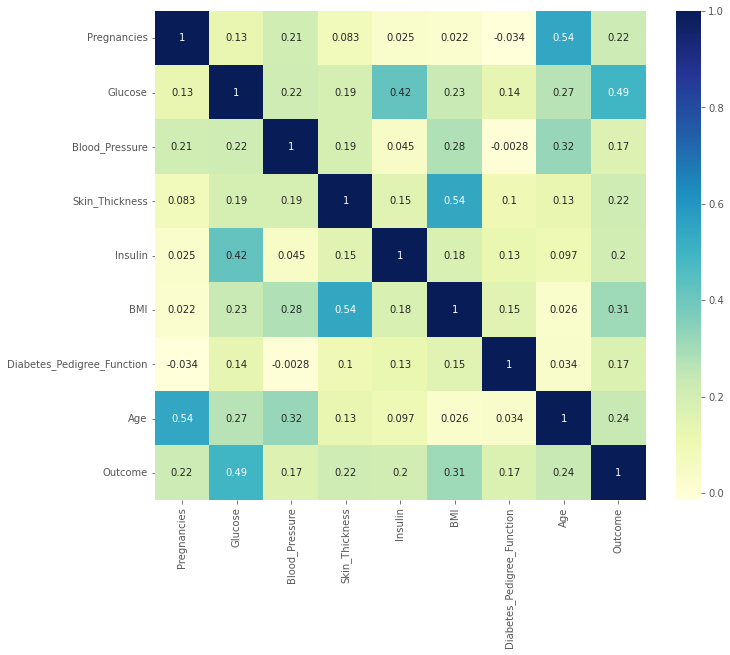

In [404]:
#Correlation of Diabetes data

plt.figure(figsize = (11,9))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', robust=True)

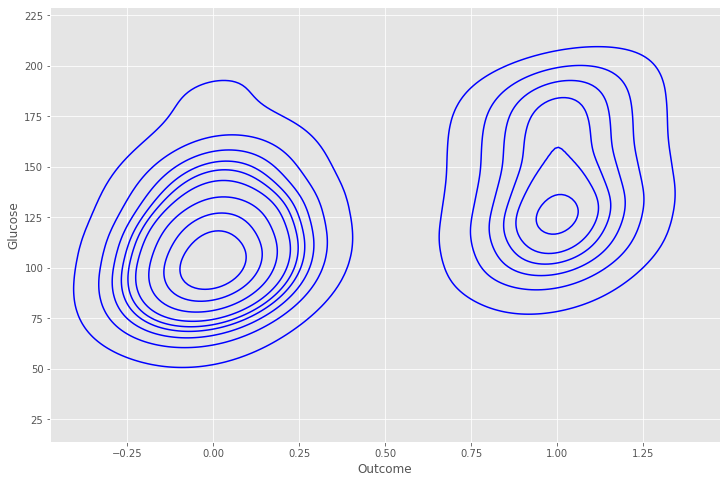

In [405]:
#KDE plot of the data
plt.figure(figsize= (12,8))
sns.kdeplot(x='Outcome', y= 'Glucose', data=data, color="blue")
plt.show()

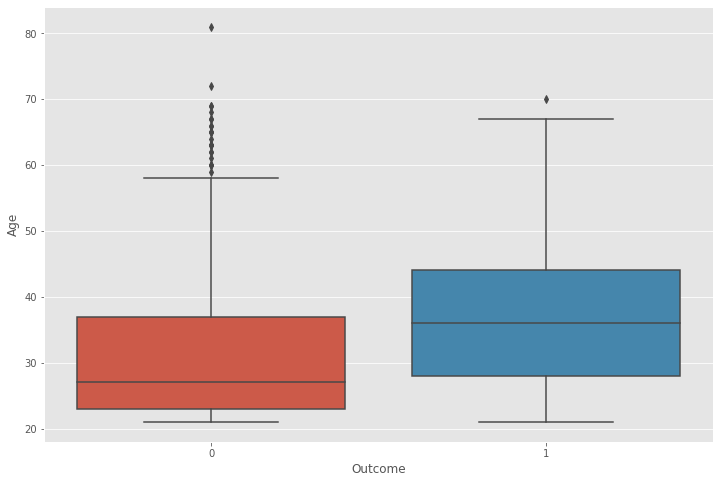

In [406]:
#Box plot of the dataset
plt.figure(figsize= (12,8))
sns.boxplot(x="Outcome", y= "Age", data=data)
plt.show()

Scatter plot for visual representation of BMI agaisnt skin thickness

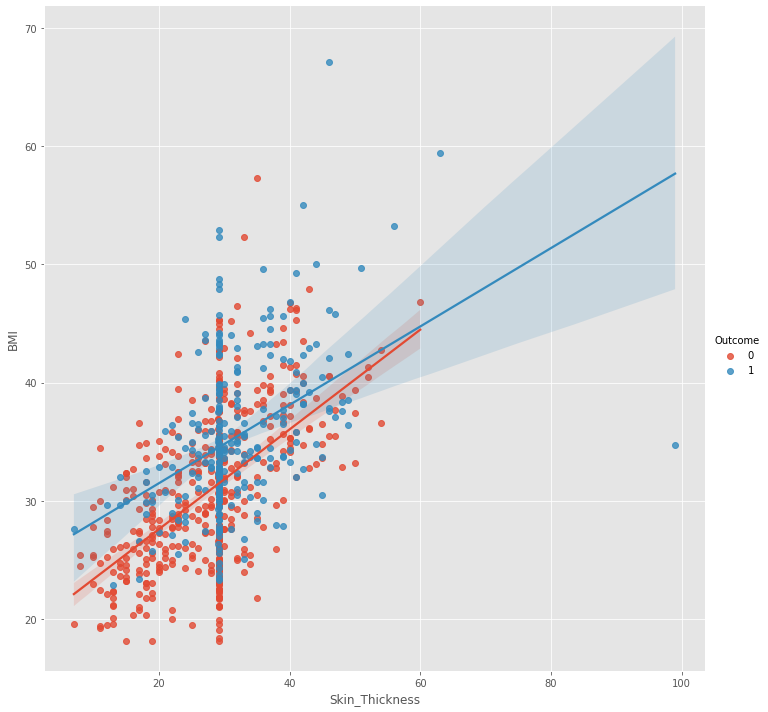

In [407]:
sns.lmplot(x='Skin_Thickness', y= 'BMI', hue='Outcome', data=data, size = 10,)
plt.show()

In [408]:
#Setting the variable type for the data
data.var()

Pregnancies                     11.354056
Glucose                        926.346983
Blood_Pressure                 146.321591
Skin_Thickness                  77.280660
Insulin                       7462.033002
BMI                             47.267706
Diabetes_Pedigree_Function       0.109779
Age                            138.303046
Outcome                          0.227483
dtype: float64

In [409]:
#Removing mean and scaling each feature
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age'])

In [410]:
Y = data.Outcome

In [411]:
# Splitting and training the data 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=3)

In [412]:
#Finally using logistic regression and accuracy score to calculate the accuracy levels of the data
logistic_reg = LogisticRegression(C=1,penalty='l2')
logistic_reg.fit(X_train, Y_train)

log_acc=accuracy_score(Y_test,logistic_reg.predict(X_test))

print(log_acc)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,logistic_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,logistic_reg.predict(X_test))*100))

0.7359307359307359
Train Set Accuracy:78.77094972067039
Test Set Accuracy:73.59307359307358
